# Détection du churn - opérateur Télécom

## Objectif
Ce premier cas d'étude vous propose de découvrir la **classification binaire** et aborde des notions fondamentales du machine learning.

Au cours de cette étude de cas, les principaux concepts abordés seront : 
* la classification binaire
* la matrice de features
* la cible d'un modèle
* un modèle de machine learning
* les arbres de décisions
* la mesures de qualité du modèle : precision, rappel, accuracy, matrice de confusion
* la courbe RoC
* un algorithme plus complet : le ramdom-forest 


Prérequis
* dataset TelcoChurnDetection

## Contexte
Vous êtes datascientist pour un opérateur télécom. Le département Marketing vous demande votre aide afin de cibler les clients qui sont insatisfaits et risque de résilier prochainement leur abonnement. Le ciblage de ces clients a pour objectif de leur proposer des offres promotionnels pour les conserver plus longtemps.
Vous décidez alors de mettre en place un modèle de prédiction du churn à partir des données de la base client.

*Churn* = attrition, départ des clients.



## Dataset

Le dataset que vous avez à disposition contient les informations suivantes : 
* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

## Lecture du jeux de données et exploration 

Le jeu de données est constitué d'un fichier CSV qui peut être lu directement dans un Dataframe pandas.

Les quelques lignes suivantes permettent la lecture du dataset et une première exploration

In [1]:
import pandas as pd 


# Set here the path to the dataset on your machine
dataset_path = "./datasets/TelcoChurnDetection/telecom_users.csv"
dataset = pd.read_csv(dataset_path, index_col=0)
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [2]:
# Needed conversion
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce').fillna(0)

Pour entraîner un modèle, il faut des données.

Les données sont généralement représentées sous forme de matrice (en mathématiques) / dataframe (en python).

Chaque **ligne** de la matrice est une "observation".

ici : **une ligne = un client**

Nb : dans la "vraie vie", il faut souvent beaucoup de travail avant de parvenir à cette matrice...

In [3]:
# Print one row ; uncomment one of the folowing line
#dataset.iloc[0]
#dataset.iloc[0, :]
dataset.loc[0,:]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [4]:
# Here check that there is one row per customer
# Hint: checkout documentation for 'value_counts'
#dataset["customerID"].value_counts().value_counts()
dupli = dataset["customerID"] == 2
dupli.value_counts()

False    5986
Name: customerID, dtype: int64

Chaque **colonne** de la matrice est une "caractéristique", ou "variable explicative", ou encore "feature".

Combien de features avons-nous ici ? Pouvez-vous les lister ?

In [5]:
# Here list the avaiable customer features and show which are numerical features
#dataset.columns.value_counts()
dataset.describe()
#dataset.dtypes

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


Une colonne est particulière, il s'agit de la **cible** (**target**).

Dans notre contexte il s'agit du *churn*.

**L'objectif du machine learning est de faire des prédictions, donc de prédire le churn avant qu'il ne se produise, sachant certaines variables explicatives**.

Il faut donc distinguer :
* les variables explicatives qui sont *connues* au moment de l'inférence
* la variable à prédire qui est *inconnue*

Dans la cellule suivante, on sépare l'ensemble des features (données connues) 'X' et la cible 'y'

In [6]:
# Features
X = dataset.drop(["Churn"], axis=1)

# target
y = dataset["Churn"]

#X, y
print("X: ", X.shape)
print("y: ", y.shape)

X:  (5986, 20)
y:  (5986,)


## Visualisation des données

Dans les cellules suivantes, on cherche à bien comprendre ce que contient le dataset

<AxesSubplot:xlabel='Churn'>

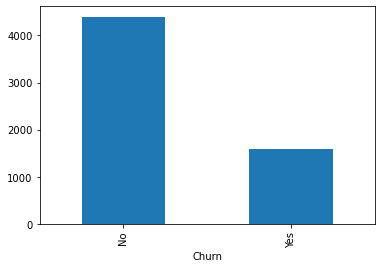

In [7]:
# Afficher ici la répartition de la cible (bar)
dataset.groupby("Churn")\
    .size()\
    .plot(kind="bar")

Naturellement, on souhaite comprendre le contenu des variables explicatives et le lien entre les variables et la cible.

On commence par regarder les 2 variables numériques :
* *tenure* : l'ancienneté du client
* *MonthlyCharges* : charge mensuelles.

Pour chacune d'elle, on dessine : 
- la distribution (histogramme ou courbe de densité)
- la corrélation avec la cible

Avant cela, on suggère de transformer la cible en variable numérique.

In [8]:
# To show correlation with target, you need a numerical column. 
# Apply the following function to the entire columns

def transform_to_binary(val):
    """
    val is equal to "Yes" or "No"
    This function should return 0 or 1
    """
    if(val == "Yes"):
        return 1
    return 0

dataset.Churn = dataset.Churn.apply(transform_to_binary)
dataset.Churn

1869    0
4528    0
6344    1
6739    0
432     0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5986, dtype: int64

In [9]:
features = ["tenure","MonthlyCharges","Churn"]

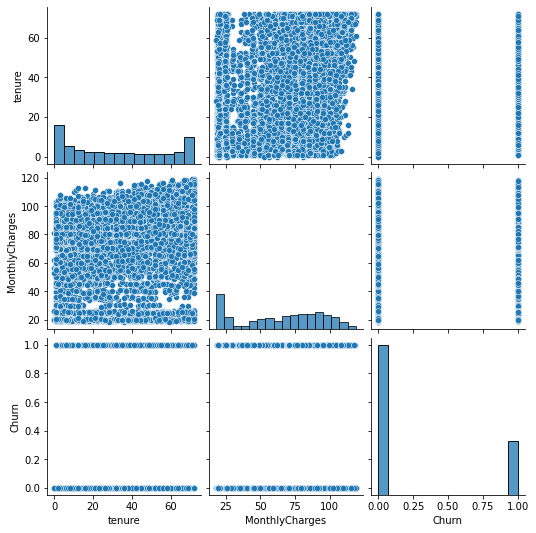

In [10]:
# Print here distribution and correlation with target
# hint: Have a look on notebook 0 : how to print pairwise correlations
import seaborn as sns

sns.pairplot(dataset[features])

## Variables catégorielles

Maintenant que nous avons vu l'influence de la durée de rétention et des charges mensuelles, nous allons nous penchez sur les 3 variables suivantes :
* *SeniorCitizen* 
* *Partner*
* *Dependents*

Aide pour afficher : https://seaborn.pydata.org/tutorial/categorical.html

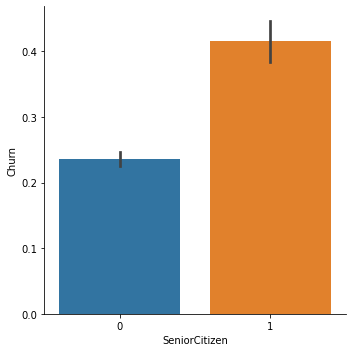

In [11]:
# Here plot relations between categorical feature and target
sns.catplot(x="SeniorCitizen", y="Churn", kind="bar", data=dataset)

# Permier modèle de Machine Learning : un arbre de décision

Il s'agit d'un modèle qu'on peut facilement se représenter : l'algorithme construit un arbre de décision, qui correspondent à l'enchaînement de plusieurs décisions de type : "SI .... ALORS....".
Par exemple : 

#### Arbre de décision avec un seul niveau (une règle)
"SI montlyCharges > 30 ALORS CHURN"

#### Arbre de décision avec 2 niveaux
* SI montlyCharges > 30 ALORS
    * ET SI tenure < 10 ALORS CHURN
    * SINON : NON CHURN
* SINON : NON CHURN


On distingue 2 phases : 
* l'**apprentissage** (*fit*) : l'algorithme de machine learning va *construire un modèle* à partir des données. Pour les arbres de décision, cela signifie créer les règles : choisir à la fois les *variables* de décision et les *seuils*. A la fin de l'apprentissage, on obtient un modèle, c'est à dire un ensemble de règles et de seuils permettant de *prédire* la cible.

* la **prédiction** : c'est lorsqu'on utilise le modèle pour effectuer des prédictions. Il s'agit d'appliquer les règles apprises par l'algorithme.


Si la phase d'apprentissage peut être (très) longue, la prédiction est généralement instantanée.


Dans les lignes suivantes, on charge, entraîne un modèle de machine learning et on l'utilise.

La première chose à faire est de mettre le dataset dans le bon format. Ce qui signifie :
* Sélection de variables
* Avoir valeurs uniquement numériques (nécessaire en général même si certains algorithmes comme les arbres de décisions ne le nécessitent pas)

## Sélection de variables & formatting
On utilise les variables observées au dessus : 
* MonthlyCharges
* tenure
* TotalCharges
* seniorCitizen
* Partner
* Dependants

In [12]:
features = ["MonthlyCharges","tenure","TotalCharges","SeniorCitizen","Partner","Dependents"]
X = X[features].copy() # copy here to not have a slice and suppress warning
X

,MonthlyCharges,tenure,TotalCharges,SeniorCitizen,Partner,Dependents
1869,24.10,72,1734.65,0,Yes,Yes
4528,88.15,44,3973.20,0,No,No
6344,74.95,38,2869.85,1,Yes,No
6739,55.90,4,238.50,0,No,No
432,53.45,2,119.50,0,No,No
...,...,...,...,...,...,...
3772,95.00,1,95.00,0,Yes,No
5191,91.10,23,2198.30,0,Yes,Yes
5226,21.15,12,306.05,0,Yes,Yes
5390,99.45,12,1200.15,1,No,No


In [13]:
# Apply function to transform categorical value
categorical_features = ["Partner","Dependents"]
for feature in categorical_features:
    X[feature] = X[feature].apply(transform_to_binary)

y = dataset.Churn
X

,MonthlyCharges,tenure,TotalCharges,SeniorCitizen,Partner,Dependents
1869,24.10,72,1734.65,0,1,1
4528,88.15,44,3973.20,0,0,0
6344,74.95,38,2869.85,1,1,0
6739,55.90,4,238.50,0,0,0
432,53.45,2,119.50,0,0,0
...,...,...,...,...,...,...
3772,95.00,1,95.00,0,1,0
5191,91.10,23,2198.30,0,1,1
5226,21.15,12,306.05,0,1,1
5390,99.45,12,1200.15,1,0,0


## Chargement du modèle et entraînement

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=100)
model

DecisionTreeClassifier(max_depth=100)

In [35]:
%time model.fit(X, y)

CPU times: total: 15.6 ms
Wall time: 25.5 ms


DecisionTreeClassifier(max_depth=100)

In [36]:
y_pred = model.predict(X)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Et voilà !!


Pour bien illustrer le modèle, nous allons voir ce qu'il y a à l'intérieur

[Text(0.46327499323593074, 0.9814814814814815, 'X[1] <= 16.5\ngini = 0.39\nsamples = 5986\nvalue = [4399, 1587]'),
 Text(0.2358486652236652, 0.9444444444444444, 'X[0] <= 68.625\ngini = 0.496\nsamples = 2150\nvalue = [1170, 980]'),
 Text(0.12507665945165944, 0.9074074074074074, 'X[1] <= 3.5\ngini = 0.418\nsamples = 1187\nvalue = [834, 353]'),
 Text(0.07282287157287157, 0.8703703703703703, 'X[0] <= 20.875\ngini = 0.493\nsamples = 518\nvalue = [289, 229]'),
 Text(0.03642857142857143, 0.8333333333333334, 'X[2] <= 36.35\ngini = 0.408\nsamples = 189\nvalue = [135, 54]'),
 Text(0.022063492063492063, 0.7962962962962963, 'X[2] <= 19.225\ngini = 0.454\nsamples = 135\nvalue = [88, 47]'),
 Text(0.01038961038961039, 0.7592592592592593, 'X[0] <= 19.125\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.009466089466089466, 0.7222222222222222, 'X[4] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.008542568542568543, 0.6851851851851852, 'X[0] <= 18.875\ngini = 0.408\nsamples = 7\nvalu

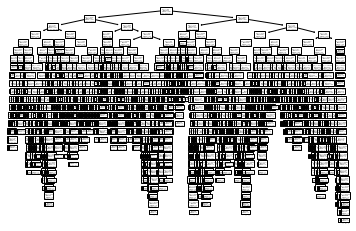

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# WARNING: Do not plot deep tree (5 is deep... but only for plotting)

plot_tree(model)

# Validation du modèle


**Comment savoir quelle est la qualité de la prédiction ?**

Est-ce que le modèle se trompe ?

Pour cela nous allons calculer les mesures suivantes :
* la précision (*precision*) : parmis les personnes prédictes CHURN, combien le sont réellement ? 
* le rappel (*recall*) : parmis les personnes qui sont CHURN, combien ont été correctement prédites ?
* l'exactitude (*accuracy*) : combien de personnes sont correctement prédites.



In [46]:
y_true = y.values

In [39]:
# Here compute true positif, false positif, false negative
TP = ((y_pred == 1) & (y_pred == y_true)).sum()
FP = ((y_pred == 1) & (y_pred != y_true)).sum()
FN = ((y_pred == 0) & (y_pred != y_true)).sum()


In [40]:
# Then compute precision, recall and accuracy
precision = TP / (TP + FP)
recall = TP / y_true.sum()
accuracy = (y_pred == y_true).sum() / y_true.shape[0]

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")

Precision: 99.36%
Recall: 97.86%
Accuracy: 99.26%


# Compromis Precision - Recall


Est-ce qu'il faut mieux plus de précision et moins de recall, ou moins de précision et plus de recall ?

A performance de modèle égal, une augmentation de la précision se fait au détriment du recall, et inversement.

Les prochaines cellules illustrent ce compromis entre performance et recall


In [48]:
y_pred_proba = model.predict_proba(X)[:,1]
y_pred_proba

array([0., 0., 1., ..., 0., 1., 0.])

In [49]:
from sklearn.metrics import precision_recall_curve

precision, recall, thr = precision_recall_curve(y_true,y_pred_proba)

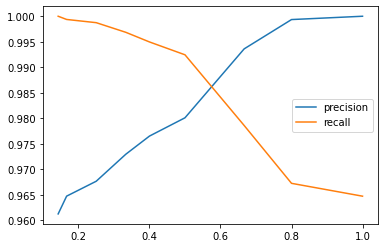

In [50]:
import matplotlib.pyplot as plt 

plt.plot(thr, precision[:-1], label="precision")
plt.plot(thr, recall[:-1], label="recall")
plt.legend()

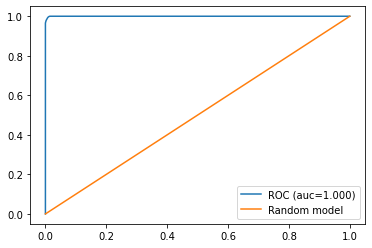

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thr = roc_curve(y_true, y_pred_proba)
auc = roc_auc_score(y_true, y_pred_proba)

plt.plot(fpr, tpr, label=f"ROC (auc={auc:.3f})")
plt.plot([0,1], [0,1], label="Random model")
plt.legend()

#### Remarques : 
* Les courbes de précision et de recall ont un sens "métier", utiles pour une analyse qualitative du modèle.
* la courbe ROC est difficile à interprêter. Il s'agit avant tout d'un moyen de **comparaison des modèles** (savoir si un modèle est meilleur qu'un autre)

## Un algorithme puissant : les forêts aléatoires (RandomForest)

Cet algorithme relativement simple offre de très belles performances dans de nombreux problèmes. C'est en quelques sorte un algorithme "couteau-suisse".

Cet algorithme est en fait basé sur les arbres de décisions. Mais plutôt que d'utiliser un seul arbre, il va en utiliser de nombreux, et essayant d'avoir de légère différences entre chaque arbre.
La prédiction finale est faite en aggrégeant les prédictions de chaque arbre, par exemple par un vote de chaque arbre.

Dans les cellules suivantes on charge le nouveau modèle et on se propose de comparer les performances du nouveau modèle.

In [52]:
# Import model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5)

In [54]:
# Fit the model
%time model.fit(X, y)

CPU times: total: 141 ms
Wall time: 522 ms


RandomForestClassifier(max_depth=5)

In [55]:
# Get new predictions
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

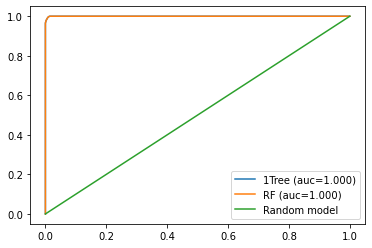

In [56]:
# Compare with RandomForest

fpr2, tpr2, thr2 = roc_curve(y_true, y_pred_proba)
auc2 = roc_auc_score(y_true, y_pred_proba)

plt.plot(fpr, tpr, label=f"1Tree (auc={auc:.3f})")
plt.plot(fpr2, tpr2, label=f"RF (auc={auc2:.3f})")
plt.plot([0,1], [0,1], label="Random model")
plt.legend()

## Conclusion

Nous avons maintenant un second algorithme dans notre boîte à outil, afin d'adresser les problèmes de **classification binaire**.
Avec ces 2 algorithmes, nous avons mis au point 2 modèles pour répondre à notre problèmatique de churn.

Beaucoup de choses peuvent cependant être améliorées ! N'hésitez pas à revenir sur ce notebook plus tard pour tenter d'améliorer le modèle.

Nous allons voir en particulier dans la suite comment rendre les modèles plus robustes et plus performants.
